# I love LSD

## Create a structured pattern in noise

In [1]:
nb_syn, noise_density, simtime, t_true = 50, 1e-4, 2e3, 1e3
T=150

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def norm(X):
    return (X-X.min())/(X.max()-X.min())

def vonmises(N_inputs, A, theta, k=2):
    return A*norm(np.exp(k*np.cos(2*np.pi*(np.linspace(0, 1, N_inputs)-theta))))

def cospattern(N_inputs, A, theta, k = 4):
    return A*norm(np.cos(np.linspace(0,k*np.pi,N_inputs)+theta))

def linear(N_inputs, A, theta):
    return np.linspace(0,A,N_inputs)

def make_input(nb_syn, noise_density, simtime, T, t_true, theta = 0, function=cospattern, seed=None):
    np.random.seed(seed)
    # draw random gaussian noise spike timings -> shape (nb_syn, nb_ev_noise)
    N_noise = int(noise_density*simtime*nb_syn)
    adress_noise = np.random.randint(0, nb_syn, N_noise)
    time_noise = np.random.randint(0, simtime, N_noise)

    # draw stimulus -> stim
    adress_pattern = np.arange(0, nb_syn)
    time_pattern = (function(nb_syn, T, theta) + t_true).astype(int)

    # make address event representation
    time = np.hstack((time_noise, time_pattern))
    addr = np.hstack((adress_noise, adress_pattern))
    sorted_times = np.argsort(time)
    aer = (addr[sorted_times], time[sorted_times])

    return (adress_noise, time_noise), (adress_pattern, time_pattern), aer

def plot_input(aer_noise, aer_pattern):
    adress_noise, time_noise = aer_noise
    adress_pattern, time_pattern = aer_pattern
    fig, ax = plt.subplots(figsize = (13, 8))
    ax.scatter(time_pattern, adress_pattern, color='red');
    ax.scatter(time_noise, adress_noise, color='grey')
    return fig, ax

In [3]:
noise = (np.random.random((nb_syn, int(noise_density*simtime)))*simtime).astype(int)
noise

array([], shape=(50, 0), dtype=int64)

In [4]:
pattern = cospattern(nb_syn, T, theta=0).T
stim = (T + pattern).astype(int)
stim

array([300, 297, 290, 278, 263, 246, 227, 208, 190, 174, 162, 153, 150,
       151, 157, 167, 181, 198, 217, 236, 255, 271, 285, 294, 299, 299,
       294, 285, 271, 255, 236, 217, 198, 181, 167, 157, 151, 150, 153,
       162, 174, 190, 208, 227, 246, 263, 278, 290, 297, 300])

In [5]:

aer_noise, aer_pattern, aer = make_input(nb_syn, noise_density, simtime, T, t_true)

In [6]:
aer_noise

(array([30, 18, 46, 20, 16, 34,  3, 32, 40, 14]),
 array([ 390, 1911, 1797, 1701, 1501,  101,  868, 1857,  491, 1912]))

In [7]:
aer_pattern

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([1150, 1147, 1140, 1128, 1113, 1096, 1077, 1058, 1040, 1024, 1012,
        1003, 1000, 1001, 1007, 1017, 1031, 1048, 1067, 1086, 1105, 1121,
        1135, 1144, 1149, 1149, 1144, 1135, 1121, 1105, 1086, 1067, 1048,
        1031, 1017, 1007, 1001, 1000, 1003, 1012, 1024, 1040, 1058, 1077,
        1096, 1113, 1128, 1140, 1147, 1150]))

In [8]:
aer_pattern[1].min()

1000

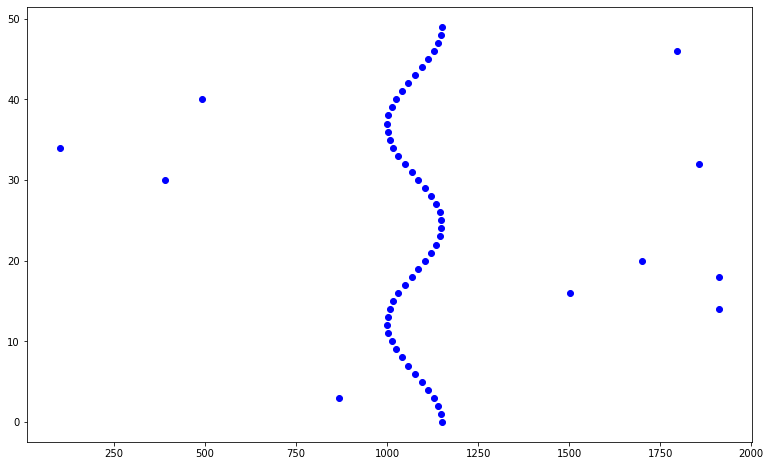

In [9]:
address, timestamp = aer
fig, ax = plt.subplots(figsize = (13, 8))
ax.scatter(timestamp, address, color='blue');

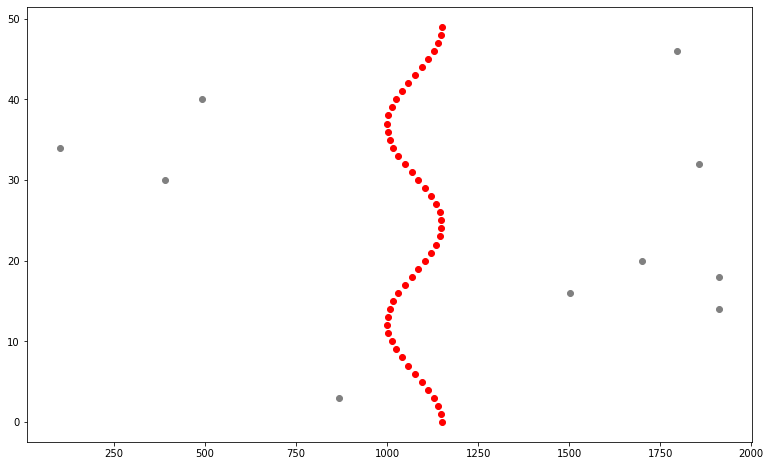

In [10]:
fig, ax = plot_input(aer_noise, aer_pattern)

In [11]:
t_true = aer_pattern[1].min()
t_true

1000

## Supervised STDP learning rule

In [12]:
address

array([34, 30, 40,  3, 37, 12, 36, 13, 38, 11, 35, 14, 39, 10, 34, 15,  9,
       40, 33, 16,  8, 41, 17, 32, 42,  7, 31, 18,  6, 43, 30, 19, 44,  5,
       29, 20, 45,  4, 28, 21, 46,  3, 22, 27, 47,  2, 26, 23,  1, 48, 25,
       24,  0, 49, 16, 20, 46, 32, 18, 14])

In [13]:
delays = np.random.randint(0, 100, nb_syn).astype(float)

In [14]:
delays[address]

array([32., 40., 48., 54., 83., 28., 62., 47., 33., 27., 53., 52., 86.,
       30., 32., 77., 67., 48., 62., 86., 71., 24., 40., 52., 54.,  3.,
       38., 39., 97., 39., 40., 46.,  5.,  4., 98., 25., 28., 50., 61.,
       69., 10., 54., 99., 87., 39., 64., 72., 20., 99., 73., 15., 63.,
       46., 82., 86., 25., 10., 52., 39., 52.])

In [15]:
timestamp

array([ 101,  390,  491,  868, 1000, 1000, 1001, 1001, 1003, 1003, 1007,
       1007, 1012, 1012, 1017, 1017, 1024, 1024, 1031, 1031, 1040, 1040,
       1048, 1048, 1058, 1058, 1067, 1067, 1077, 1077, 1086, 1086, 1096,
       1096, 1105, 1105, 1113, 1113, 1121, 1121, 1128, 1128, 1135, 1135,
       1140, 1140, 1144, 1144, 1147, 1147, 1149, 1149, 1150, 1150, 1501,
       1701, 1797, 1857, 1911, 1912])

In [16]:
T = 100 # duration of a stimulus

class SD_neuron(object):
    """
    Synchrony detector neuron
    
    """
    def __init__(self, nb_syn, T=T,  tau=50, weight=.01):
        self.delays = np.random.randint(0, T, nb_syn).astype(float)
        self.tau = tau # membrane time constant
        self.weight = weight # integration weight

    def code(self, stream):

        address, timestamp = stream

        delayed_timestamp = timestamp + self.delays[address]

        sorted_ind_times = np.argsort(delayed_timestamp)

        V_old, t_old = 0., 0. # initial membrane potential
        V = []
        times = []
        for i_time in sorted_ind_times:
            time = delayed_timestamp[i_time]
            V_new = V_old + self.weight * np.exp(-(time-t_old)/self.tau )
            V.append(V_new)
            times.append(time)
            V_old = V_new
            t_old = time

        return np.array(times), np.array(V)


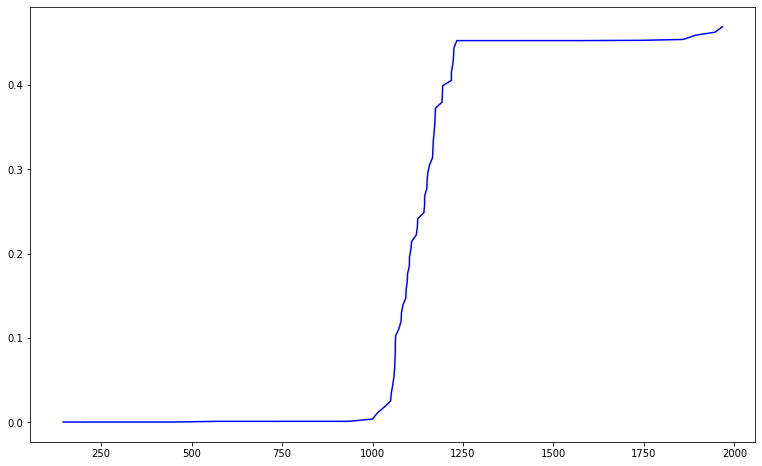

In [17]:
N = SD_neuron(nb_syn)

sorted_times, V = N.code(aer)
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(sorted_times, V, color='blue');

In [18]:
V

array([0.00055023, 0.00057358, 0.00136224, 0.00136986, 0.00404121,
       0.01159905, 0.01843766, 0.02555536, 0.03516326, 0.04439442,
       0.05381207, 0.06341996, 0.07322195, 0.08302394, 0.09302394,
       0.10282592, 0.11117862, 0.12004783, 0.12984982, 0.13908098,
       0.14760242, 0.1574044 , 0.16682205, 0.17662404, 0.18567241,
       0.19567241, 0.20490357, 0.21451147, 0.22222198, 0.23163963,
       0.24144162, 0.24855932, 0.25816721, 0.26816721, 0.27703642,
       0.2868384 , 0.2964463 , 0.30549467, 0.31401611, 0.3238181 ,
       0.33362008, 0.34322798, 0.35283587, 0.36263786, 0.37243985,
       0.37941661, 0.3892186 , 0.39902058, 0.40520842, 0.41520842,
       0.42443958, 0.43404748, 0.44384946, 0.4523709 , 0.45238139,
       0.45271512, 0.45375863, 0.4588248 , 0.46228935, 0.46885982])

In [19]:
V>1.

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [20]:
np.argmax(V>1)

0

In [21]:
t_out = sorted_times[np.argmax(V>1)]
t_out

145.0

0.022248026747920528


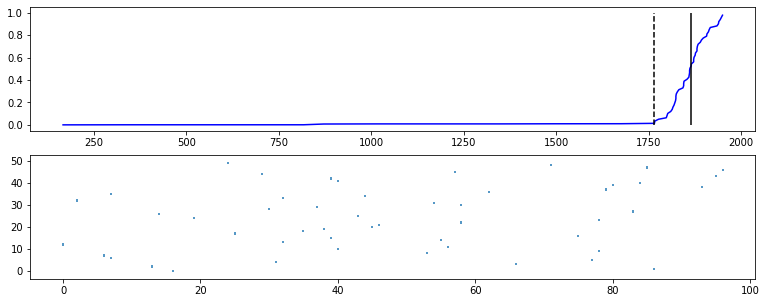

0.024284656627691574


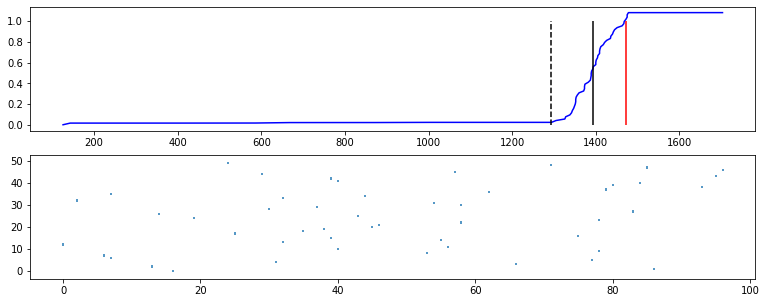

0.026154251075061377


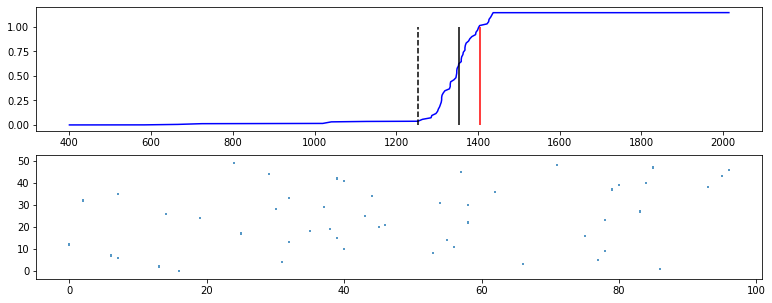

0.028052781399331463


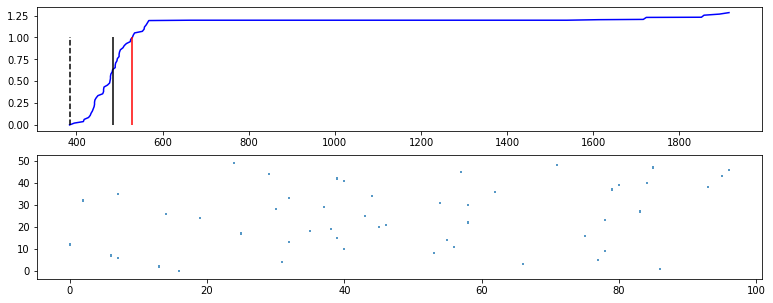

0.02943574976549584


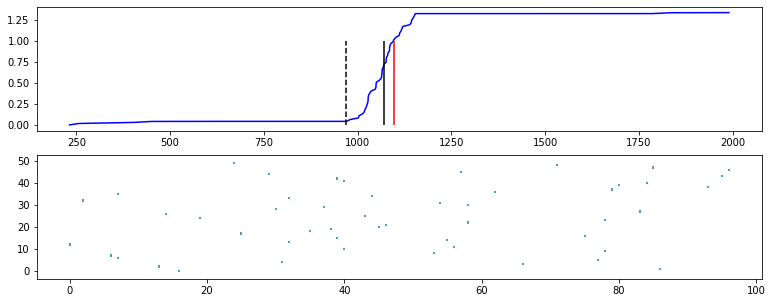

0.030346806593846268


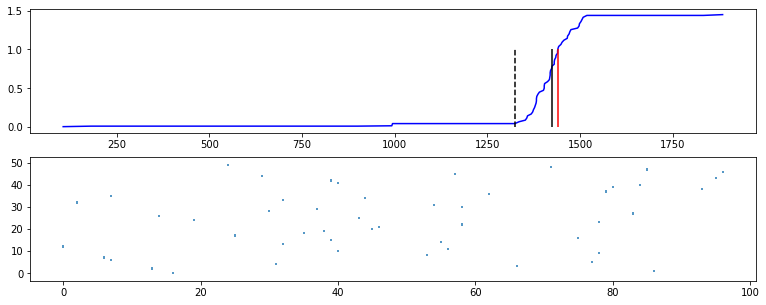

0.031394420946585476


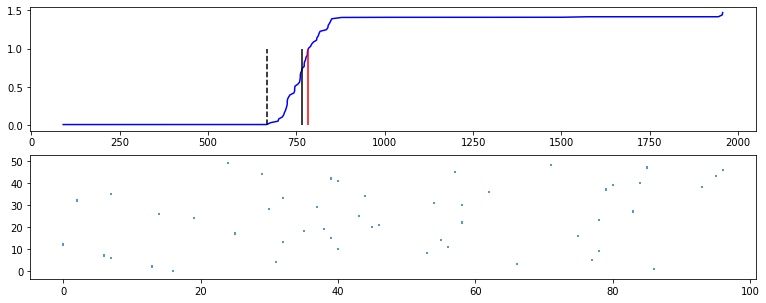

0.0323661000036286


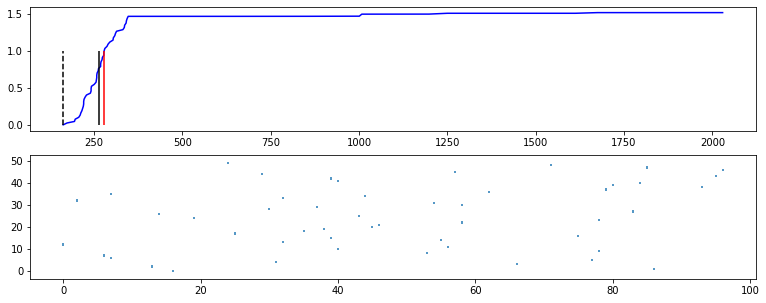

0.03306688452671612


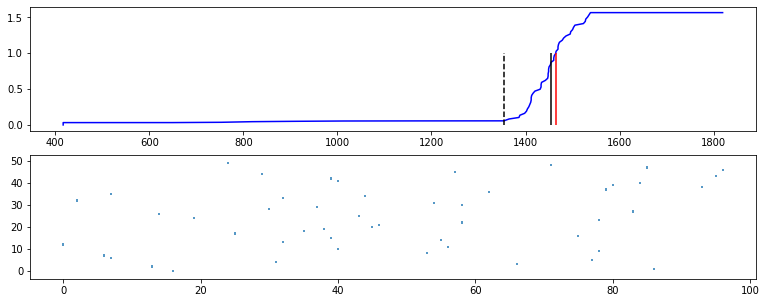

0.0340301645784274


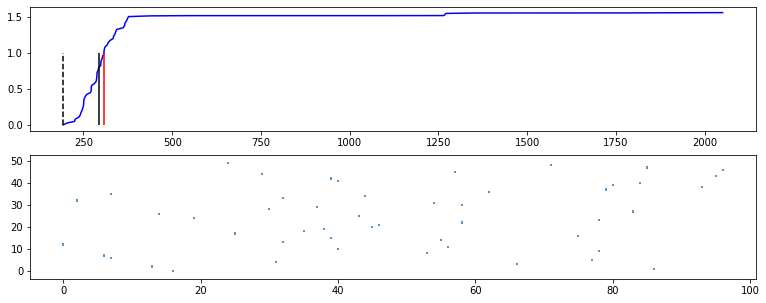

In [31]:

Dweight0 = 1e-1
Ddelay0 = 1e-2
N_epochs = 10

for i_epoch in range(N_epochs):
    t_true = int(np.random.rand()*(simtime-T))
    aer_noise, aer_pattern, aer = make_input(nb_syn, noise_density, simtime, T, t_true)
    sorted_times, V = N.code(aer)

    # STDP rule on the weights
    if V.max() < 1: # does not spike : the weight is too low
        Dweight = Dweight0
    else:
        t_out = sorted_times[np.argmax(V>1)]
        time_error = (t_true+T) - t_out # negative= too early, positive = too late
        Dweight = Dweight0 * np.tanh( - time_error / N.tau )

    # STDP rule on the weights
    if V.max() > 1: # does not spike : no learning on delays
        t_out = sorted_times[np.argmax(V>1)] # output spike
        #print(sorted_times)
        Ddelay = Ddelay0 * np.tanh( time_error / N.tau )

    N.weight *= 1 + Dweight
    print(N.weight)

    fig, axs = plt.subplots(2, 1, figsize = (13, 5))
    axs[0].plot(sorted_times, V, color='blue');
    axs[0].vlines([t_true], 0, 1, linestyles='--', color='black');
    axs[0].vlines([t_true+T], 0, 1, color='black');
    if V.max() > 1: axs[0].vlines([t_out], 0, 1, color='red');
    axs[1].eventplot(N.delays[:,np.newaxis]);
    plt.show()